<a href="https://colab.research.google.com/github/nerobite/neural_networks/blob/main/Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
train = pd.read_csv('train.csv')
print ("the shape of train data is " , train.shape )
train

the shape of train data is  (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test = pd.read_csv('test.csv')
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


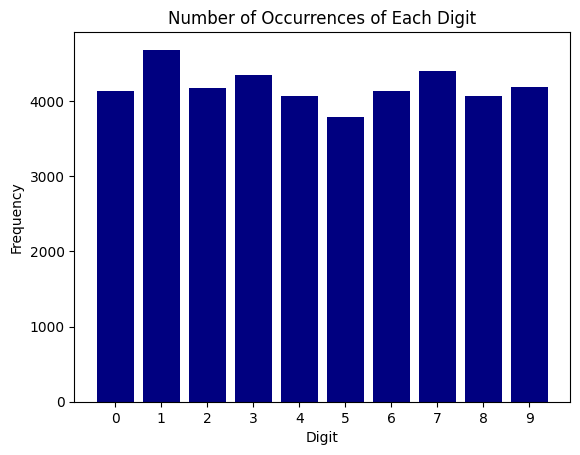

In [ ]:
# Count the occurrences of each label and sort by index (digit)
label_counts = train['label'].value_counts().sort_index()

# Ensure all digits are represented in the x-axis, even if their count is zero
all_digits = np.arange(0, 10)

# Get counts for each digit, fill missing ones with zero
counts = label_counts.reindex(all_digits, fill_value=0)

# Create bar plot
plt.bar(counts.index, counts.values, color='navy')

plt.title('Number of Occurrences of Each Digit')
plt.xlabel('Digit')
plt.ylabel('Frequency')

# Set x-ticks to be clearly labeled for each digit
plt.xticks(all_digits)

plt.show()

Распределение цифр примерно равномерное, что предполагает сбалансированный набор данных, который идеально подходит для задач классификации машинного обучения, поскольку может предотвратить смещение в сторону более частых классов.


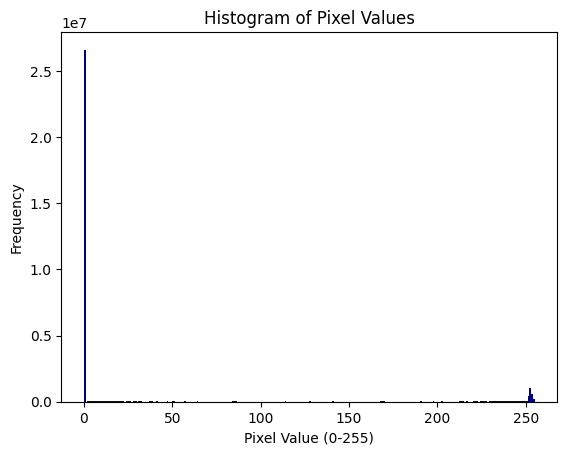

In [ ]:
# Plot the histogram for pixel-distribution

# Drop the 'label' column and convert the data to a 1D array
pixel_values = train.drop('label', axis=1).values.flatten()

# Generate the histogram
plt.hist(pixel_values, bins=256, color='navy')

plt.title('Histogram of Pixel Values')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')

plt.show()

Ярко выраженный пик слева указывает на обилие черных пикселей, а пик справа — на наличие белых пикселей. Нехватка значений среднего диапазона означает, что эти изображения имеют высокий контраст с преимущественно черным фоном и более светлыми деталями, т. е. цифры обычно белые на черном фоне, что способствует наблюдаемому резкому бимодальному распределению.


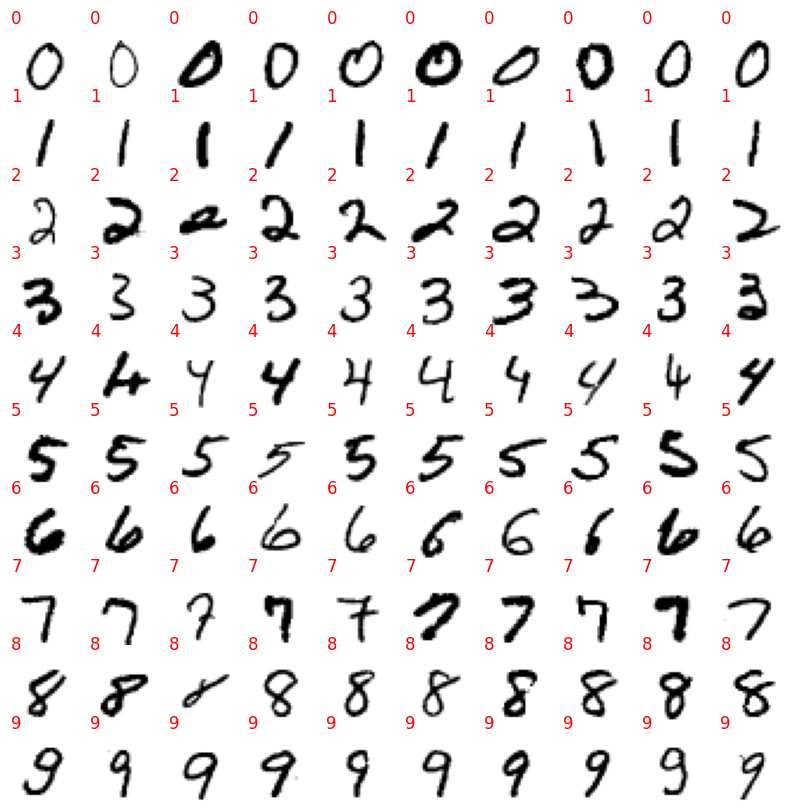

In [ ]:
# Display Samples Digits

# Number of samples to display for each digit
num_samples = 10

# Calculate the number of unique digits in df
num_digits = train['label'].nunique()

# Plot the digits
fig, axs = plt.subplots(num_digits, num_samples, figsize=(num_samples, num_digits))
for i in range(num_digits):
    digits = train[train['label'] == i].sample(num_samples)
    for j in range(num_samples):
        img_data = digits.iloc[j, 1:].values.reshape(28, 28)
        axs[i, j].imshow(img_data, cmap=plt.cm.binary)
        # Place a text label inside each subplot
        axs[i, j].text(0, -4, str(i), color='red', fontsize=12)
        axs[i, j].axis('off')

plt.show()

In [ ]:
# Извлечение меток классов и пиксельных значений изображений из датасета
labels = train['label']
images = train.drop('label', axis=1)

In [ ]:
images

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Преобразование датасета в массив NumPy, Предполагая, что изображения имеют размер 28x28 пикселей
images_array = images.to_numpy().reshape(-1, 28, 28)

In [ ]:
images_array.shape

(42000, 28, 28)

In [ ]:
train1 = np.loadtxt('train.csv', delimiter=',', skiprows=1)
test1 = np.loadtxt('test.csv', delimiter=',', skiprows=1)

In [ ]:
train1.shape

(42000, 785)

In [ ]:
train1

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [7., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#почему на одних данных получается разная размерность... непонятно...

In [ ]:
# сохраняем разметку в отдельную переменную
train_label = train1[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train1[:, 1:], (train1.shape[0], 28, 28))
test_img = np.resize(test1, (test1.shape[0], 28, 28))

In [ ]:
train_label

array([1., 0., 1., ..., 7., 6., 9.])

In [ ]:
train_img.shape

(42000, 28, 28)

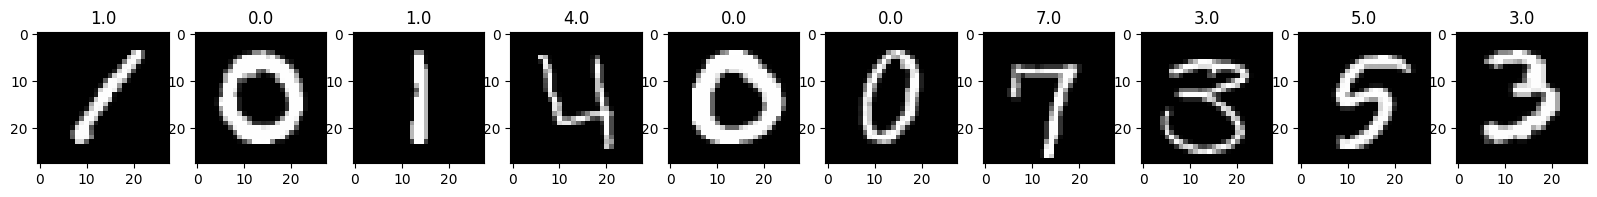

In [ ]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:10], 1):
    subplot = fig.add_subplot(1, 10, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

In [ ]:
#Вычисляем X и Y составляющие градиента с помощью оператора Собеля
train_sobel_x = np.zeros_like(train_img)
train_sobel_y = np.zeros_like(train_img)
for i in range(len(train_img)):
    train_sobel_x[i] = cv2.Sobel(train_img[i], cv2.CV_64F, dx=1, dy=0, ksize=3)
    train_sobel_y[i] = cv2.Sobel(train_img[i], cv2.CV_64F, dx=0, dy=1, ksize=3)

In [ ]:
test_sobel_x = np.zeros_like(test_img)
test_sobel_y = np.zeros_like(test_img)
for i in range(len(test_img)):
    test_sobel_x[i] = cv2.Sobel(test_img[i], cv2.CV_64F, dx=1, dy=0, ksize=3)
    test_sobel_y[i] = cv2.Sobel(test_img[i], cv2.CV_64F, dx=0, dy=1, ksize=3)

In [ ]:
#Вычисляем угол и длину вектора градиента
train_g, train_theta = cv2.cartToPolar(train_sobel_x, train_sobel_y)

In [ ]:
test_g, test_theta = cv2.cartToPolar(test_sobel_x, test_sobel_y)

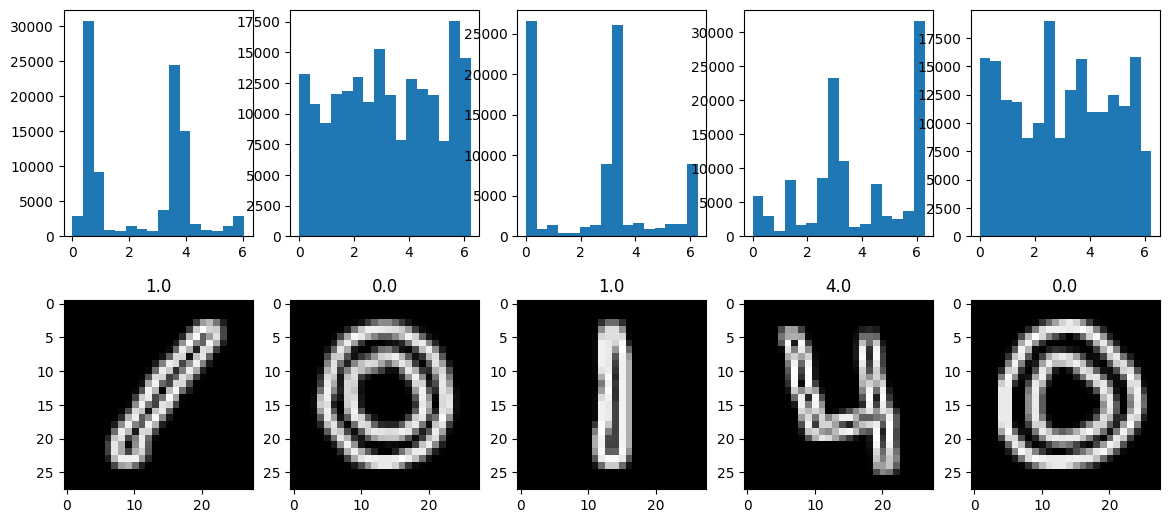

In [ ]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_g[:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);
    subplot = fig.add_subplot(3, 7, i)
    plt.hist(train_theta[i - 1].flatten(),
             bins=16, weights=train_g[i - 1].flatten())

In [ ]:
#Вычисляем гистограммы градиентов


In [ ]:
# Определение числа интервалов в гистограмме
num_bins = 9

# Разделение диапазона углов на интервалы
bin_size = 180 / num_bins

In [ ]:
# Инициализация пустых гистограмм для обучающего и тестового набора
train_hist = np.zeros((train_theta.shape[0], train_theta.shape[1], num_bins))
test_hist = np.zeros((test_theta.shape[0], test_theta.shape[1], num_bins))

In [ ]:
# Вычисление гистограмм градиентов
for i in range(train_theta.shape[0]):
    for j in range(train_theta.shape[1]):
        angle = train_theta[i, j] * 180 / np.pi
        bin_index = (angle / bin_size).astype(int)  # Преобразование в int
        weight = train_g[i, j]
        train_hist[i, j, bin_index % num_bins] += weight
        train_hist[i, j, (bin_index + 1) % num_bins] += (weight * (angle % bin_size) / bin_size)  # Взвешивание соседнего интервала

for i in range(test_theta.shape[0]):
    for j in range(test_theta.shape[1]):
        angle = test_theta[i, j] * 180 / np.pi
        bin_index = (angle / bin_size).astype(int)  # Преобразование в int
        weight = test_g[i, j]
        test_hist[i, j, bin_index % num_bins] += weight
        test_hist[i, j, (bin_index + 1) % num_bins] += (weight * (angle % bin_size) / bin_size)  # Взвешивание соседнего интервала

In [ ]:
train_hist

array([[[   0.        ,    0.        ,    0.        , ...,
            0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        , ...,
            0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        , ...,
            0.        ,    0.        ,    0.        ],
        ...,
        [   0.        ,    0.        ,    0.        , ...,
            0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        , ...,
            0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        , ...,
            0.        ,    0.        ,    0.        ]],

       [[   0.        ,    0.        ,    0.        , ...,
            0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        , ...,
            0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        , ...,
            0.

In [ ]:
# Нормализация гистограмм градиентов
epsilon = 1e-5  # Малое число для избежания деления на ноль
train_hist_normalized = np.zeros_like(train_hist)
test_hist_normalized = np.zeros_like(test_hist)

for i in range(train_hist.shape[0]):
    for j in range(train_hist.shape[1]):
        block = train_hist[i, j]
        train_hist_normalized[i, j] = block / np.sqrt(np.sum(block ** 2) + epsilon)

for i in range(test_hist.shape[0]):
    for j in range(test_hist.shape[1]):
        block = test_hist[i, j]
        test_hist_normalized[i, j] = block / np.sqrt(np.sum(block ** 2) + epsilon)

In [ ]:
train_hist_normalized


array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingClassifier

In [ ]:
# Выравнивание гистограмм перед использованием
train_data = train_hist_normalized.reshape(train_hist_normalized.shape[0], -1)
test_data = test_hist_normalized.reshape(test_hist_normalized.shape[0], -1)

In [ ]:
# Обработка отсутствующих значений
imputer = SimpleImputer(strategy='mean')
train_data_imputed = imputer.fit_transform(train_data)
test_data_imputed = imputer.transform(test_data)

In [ ]:
# Разделение данных на обучающий и тестовый набор
X_train, X_val, y_train, y_val = train_test_split(train_data, train_label, test_size=0.2, random_state=42)

In [ ]:
# Обучение модели HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)

HistGradientBoostingClassifier()

In [ ]:
# Оценка модели
accuracy = model.score(X_val, y_val)
print("Accuracy of the HistGradientBoostingClassifier model:", accuracy)

Accuracy of the HistGradientBoostingClassifier model: 0.9327380952380953


In [ ]:
prediction = model.predict_proba(test_data_imputed)

In [ ]:
prediction

array([[4.10995804e-06, 2.93413582e-07, 9.99793314e-01, ...,
        1.14272053e-05, 1.36596196e-05, 8.12518076e-06],
       [9.94619837e-01, 7.68118458e-07, 1.43514036e-04, ...,
        8.59465107e-06, 3.54046999e-03, 7.58295992e-04],
       [8.61355116e-04, 4.94858227e-05, 1.84031701e-03, ...,
        6.22152026e-03, 5.01218590e-03, 9.40849522e-01],
       ...,
       [2.47634288e-05, 2.04555790e-06, 9.35503140e-06, ...,
        1.01971124e-05, 1.57432107e-04, 1.69368799e-05],
       [8.61246724e-05, 3.06681706e-05, 7.98915848e-05, ...,
        8.51324448e-04, 2.66069002e-04, 9.87519690e-01],
       [1.07408724e-05, 1.60388206e-07, 9.99755375e-01, ...,
        1.21003616e-05, 9.61476244e-06, 7.38689499e-06]])

In [ ]:
pred = model.predict(test_data_imputed)

In [ ]:
pred

array([2., 0., 9., ..., 3., 9., 2.])

In [ ]:
df = pd.DataFrame(pred, columns = ['Label'])
df['Label'] = df['Label'].astype(int)
df.index.name='ImageId'
df.index += 1
df.to_csv('results.csv', header=True)

In [ ]:
df

,Label
ImageId,
1,2
2,0
3,9
4,2
5,3
...,...
27996,9
27997,7
27998,3


In [ ]:
#public score = 0.93085